# Warp affine transformations

## Task

Given a document image transform it to a scanner like perspective.

Use your own document image.

In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [53]:
im_photo = cv2.imread("input/photo_doc.jpg",0)
im_scanned = cv2.imread("input/scanned.jpg",0)

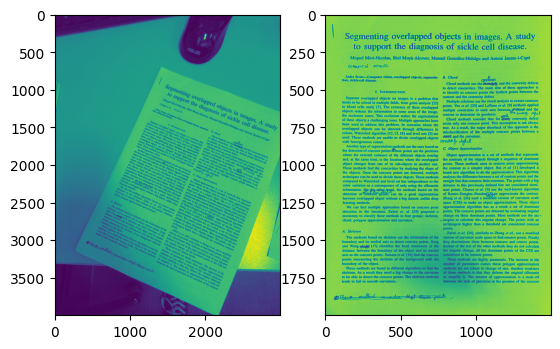

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im_photo);
ax2.imshow(im_scanned);

## Interesting links

* [cv2.getAffineTransform documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga8f6d378f9f8eebb5cb55cd3ae295a999)
* [cv2.warpAffine documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)

# My code

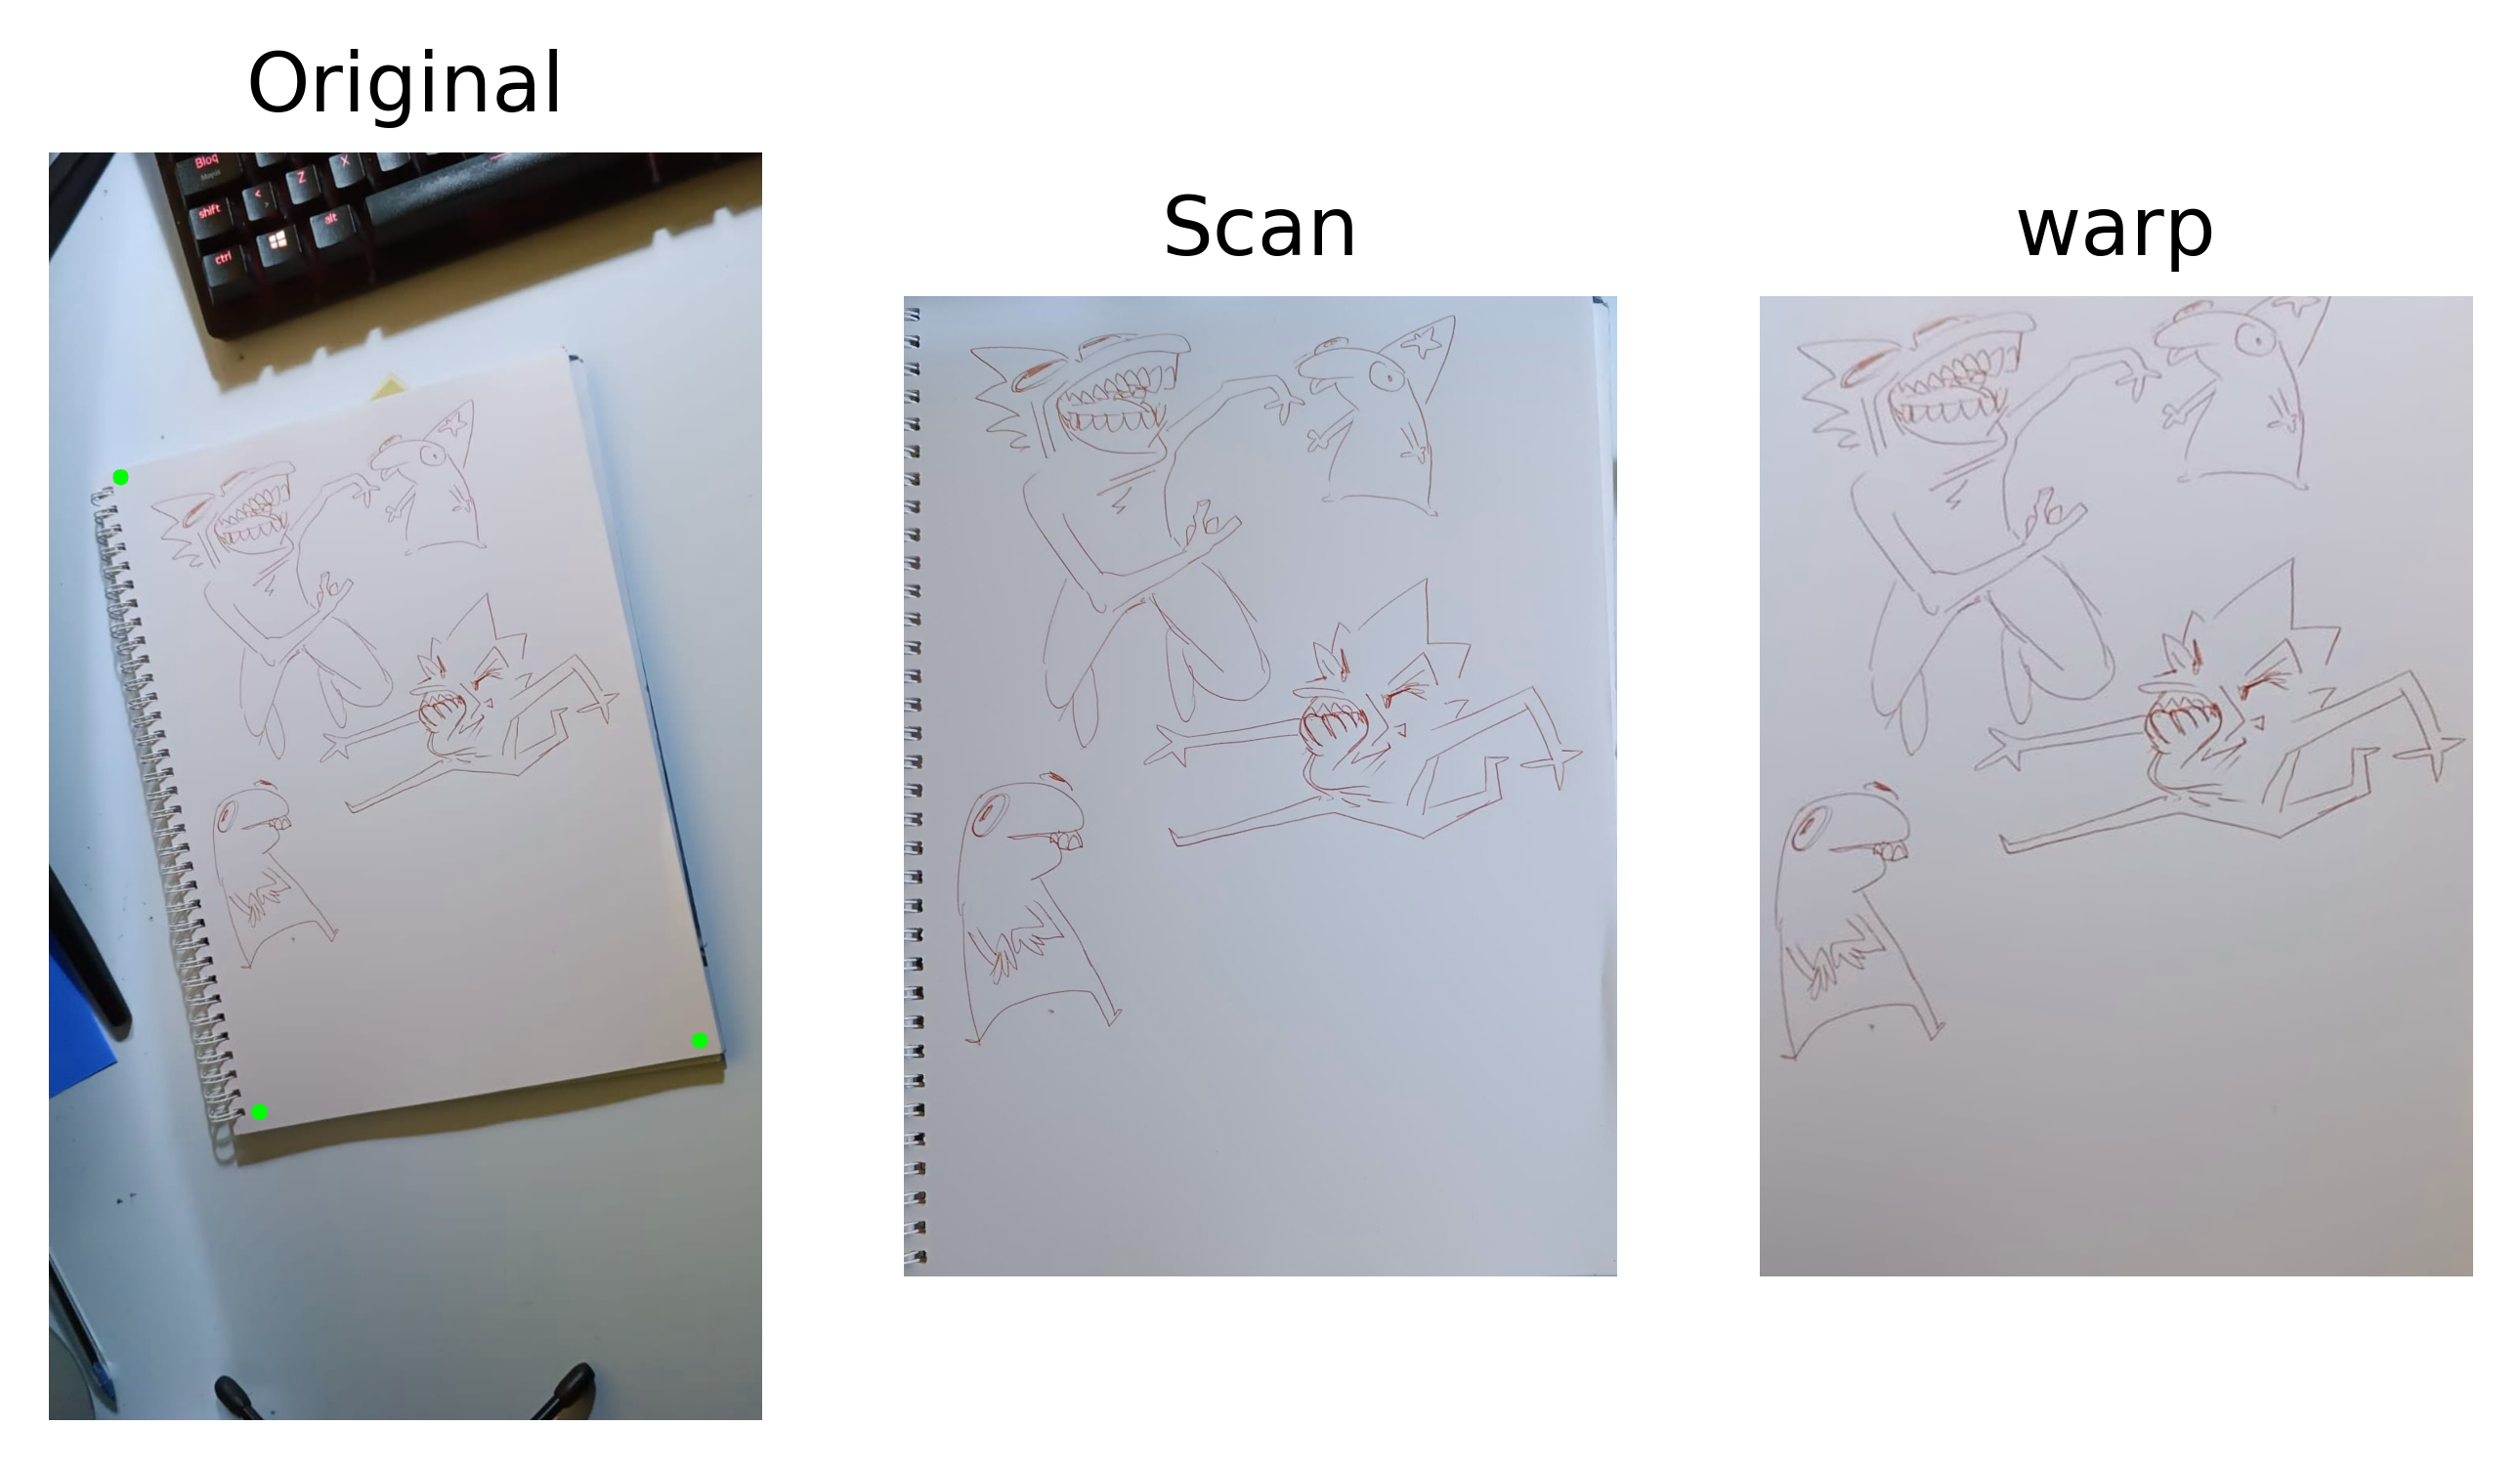

In [125]:
# Change the image
src = cv2.imread("input/notebook.jpeg")
scan = cv2.imread("input/notebook_scan.jpeg")

cp = src.copy()

pt0 = [90,410]
pt1 = [265, 1210]
pt2 = [820, 1120]



OriginPts = np.array([pt0, pt1, pt2]).astype(np.float32)
DstPts = np.array([[0, 0], [0, scan.shape[0] - 1], [scan.shape[1] - 1, scan.shape[0] - 1]]).astype(np.float32)

warp_mat = cv2.getAffineTransform(OriginPts, DstPts)
warp_dst = cv2.warpAffine(src, warp_mat, (scan.shape[1], scan.shape[0]))

cp = cv2.circle(cp,center = pt0, radius = 10,color= (0,255,0), thickness= -1)
cp = cv2.circle(cp,center = pt1, radius = 10,color= (0,255,0), thickness= -1)
cp = cv2.circle(cp,center = pt2, radius = 10,color= (0,255,0), thickness= -1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(500)
ax1.axis('off')
ax1.imshow(cp);
ax1.title.set_text('Original')

ax2.axis('off')
ax2.imshow(scan);
ax2.title.set_text('Scan')

ax3.axis('off')
ax3.imshow(warp_dst);
ax3.title.set_text('warp')



plt.show()